## ОПИСАТЕЛЬНАЯ СТАТИСТИКА

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics as st

In [2]:
df=pd.read_csv('../dataset/car.csv', delimiter=',').drop(['Market Category'], axis=1)
# .dropna()

Посмотрим основные колонки из таблицы

In [3]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Vehicle Size', 'Vehicle Style', 'highway MPG',
       'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [4]:
df.head(20)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,27,18,3916,37200


In [5]:
df.shape

(11914, 15)

In [6]:
df.Make.unique()

array(['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan',
       'Volvo', 'Mazda', 'Mitsubishi', 'Ferrari', 'Alfa Romeo', 'Toyota',
       'McLaren', 'Maybach', 'Pontiac', 'Porsche', 'Saab', 'GMC',
       'Hyundai', 'Plymouth', 'Honda', 'Oldsmobile', 'Suzuki', 'Ford',
       'Cadillac', 'Kia', 'Bentley', 'Chevrolet', 'Dodge', 'Lamborghini',
       'Lincoln', 'Subaru', 'Volkswagen', 'Spyker', 'Buick', 'Acura',
       'Rolls-Royce', 'Maserati', 'Lexus', 'Aston Martin', 'Land Rover',
       'Lotus', 'Infiniti', 'Scion', 'Genesis', 'HUMMER', 'Tesla',
       'Bugatti'], dtype=object)

count - количество значений
unique - количество уникальных значений
top - наиболее распространенное значение.
Freq - это частота наиболее распространенного значения.

# Центральные метрики
Центральные метрики показывают центр или средние значения наборов данных.
1.	Среднеарифметическое;
2.	Средневзвешенное;
3.	Медиана;
4.	Мода.


## Математические ожидание и среднее значение

**Математи́ческое ожида́ние** — одно из важнейших понятий в теории вероятностей, означающее среднее (взвешенное по вероятностям возможных значений) значение случайной величины. В случае непрерывной случайной величины подразумевается взвешивание по плотности распределения.

На практике математическое ожидание обычно оценивается как среднее арифметическое наблюдаемых значений случайной величины (выборочное среднее, среднее по выборке). Доказано, что при соблюдении определенных слабых условий (в частности, если выборка является случайной, то есть наблюдения являются независимыми) выборочное среднее стремится к истинному значению математического ожидания случайной величины при стремлении объема выборки (количества наблюдений, испытаний, измерений) к бесконечности.

Складываем все значения выборки и делим на количество элементов в выборке

![img](https://drive.google.com/uc?id=1qfg784gUi1rA6FyRogWNsIPt5djCaM6a)

In [7]:
from sklearn.preprocessing import LabelEncoder
import statistics as st
import math
st.mean(df.MSRP)

40594.737032063116

In [8]:
sum(df.MSRP)/len(df.MSRP)

40594.737032063116

In [9]:
# make = LabelEncoder().fit_transform(df.Make)
# msrp = df.MSRP

# fig, ax = plt.subplots()
# fig.set_size_inches(10, 12)
# ax.scatter(msrp, make, c='red', alpha=0.3, edgecolors='none')
# ax.set_yticks(range(make.min(),make.max()+1))
# ax.grid(True)
# plt.xlabel('MSRP')
# plt.ylabel('Make')
#plt.show()

## Средневзвешенное

Также его называеют средневзвешенным арифметическим или средневзвешенным значением, является обобщением среднего арифметического, которое позволяет вам определить относительный вклад каждой точки данных в результат.

In [10]:
print(df.MSRP.mean())

40594.737032063116


## Медиана

 **Медиана** - это такое значение, что ровно половина выборки меньше него, а ровно половина - больше.

In [11]:
print('Медиана: ', st.median(df.MSRP))
print('Медиана: ', st.median_low(df.MSRP))
print('Медиана: ', st.median_high(df.MSRP))
print('Медиана по столбцам:')
print(df.median(numeric_only=True))

Медиана:  29995.0
Медиана:  29995
Медиана:  29995
Медиана по столбцам:
Year                 2015.0
Engine HP             227.0
Engine Cylinders        6.0
Number of Doors         4.0
highway MPG            26.0
city mpg               18.0
Popularity           1385.0
MSRP                29995.0
dtype: float64


`median_low()` возвращает меньшее, а `median_high() `— большее среднее значение.

Основное различие между поведением среднего значения и медианы связано с выбросами или экстремальными значениями. Среднее значение сильно зависит от выбросов, а медиана либо незначительно зависит от выбросов, либо вообще не зависит. Вы можете сравнить среднее значение и медиану как один из способов обнаружения выбросов и асимметрии в ваших данных.

## Мода

Мода - значение, которое наиболее часто встречается в выборке

In [12]:
print('Значение моды: ', st.mode(df.MSRP))

Значение моды:  2000


In [13]:
print('Значение моды: ', st.multimode(df.MSRP))

Значение моды:  [2000]


Обратите внимание,` mode()` возвращает одно значение, а `multimode()` в результате возвращает список. Однако, это не единственное различие между двумя функциями. Если существует более одного модального значения, то `mode()` вызывает StatisticsError, а `multimode()` возвращает список со всеми режимами.

In [14]:
print('Значение моды: ', df.MSRP.mode())

Значение моды:  0    2000
Name: MSRP, dtype: int64


## Минимум и максимум

In [15]:
np.min(df.MSRP)

2000

In [16]:
df.min(numeric_only=True)

Year                1990.0
Engine HP             55.0
Engine Cylinders       0.0
Number of Doors        2.0
highway MPG           12.0
city mpg               7.0
Popularity             2.0
MSRP                2000.0
dtype: float64

In [17]:
np.max(df.MSRP)

2065902

In [18]:
df.max(numeric_only=True)

Year                   2017.0
Engine HP              1001.0
Engine Cylinders         16.0
Number of Doors           4.0
highway MPG             354.0
city mpg                137.0
Popularity             5657.0
MSRP                2065902.0
dtype: float64

# Метрики оценки вариативности данных

Центральных метрик недостаточно для описания данных. Практически всегда необходимы метрики оценки вариативности данных, которые количественно определяют разброс точек данных. В этом разделе вы узнаете, как определить и рассчитать следующие показатели:
1.	дисперсия;
2.	среднеквадратичное отклонение;
3.	смещение;
4.	процентили;
5.	диапазон;


## Дисперсия

Дисперсия - квадрат стандартного отклонения. Количественно определяет разброс данных. Численно показывает, как далеко точки данных от среднего значения.

Дисперсия позволяет нам понять, насколько сильно значения отклоняются от среднего.





На этом рисунке представлены два набора данных:
Зеленые точки — этот набор данных с небольшой дисперсией или небольшим отклонением от среднего. У него меньший диапазон или меньшая разница между самым большим и самым маленьким значениями.
Белые точки — этот набор данных с большой дисперсией или большим отклонением от среднего. У него больший диапазон или большая разница между самым большим и самым маленьким значениями.
Обратите внимание, что эти два набора имеют одно и то же среднее значение и медиану, даже если они значительно различаются. Ни среднее, ни медиана не могут показать эту разницу. Вот почему нужны метрики вариативности.


In [19]:
st.pvariance(df.MSRP)

3612801070.604593

In [20]:
data = df.MSRP
mean = data.mean()
ddof=0
variance = sum((x - mean)**2 for x in data) / (len(data) - ddof)
variance

3612801070.6046143

In [21]:
df.MSRP.var(ddof=0)

3612801070.604593

In [22]:
df.MSRP.var(ddof=1)

3613104336.034846

ddof - это параметр, который указывает на количество степеней свободы, вычитаемых из общего числа наблюдений при вычислении оценки дисперсии.
ddof=1 указывает на использование несмещенной оценки дисперсии.
При вычислении выборочной дисперсии используется несмещенная оценка, которая делит сумму квадратов отклонений на n - ddof, где n - это общее количество наблюдений. При этом, если ddof=0, то используется смещенная оценка дисперсии, которая делит сумму квадратов отклонений на n.

## Стандартное отклонение

Стандартное отклонение выборки является еще одним показателем разброса данных. Он связан с оценкой дисперсией, поскольку стандартное отклонение есть положительным квадратный корень из оценки дисперсии.

Как и дисперсия, стандартное отклонение отражает разницу между всеми значениями и средним значением. Используя квадратный корень из дисперсии, стандартное отклонение измеряется в тех же единицах, что и значения
исходного набора данных.

Стандартное отклонение часто более удобно, чем дисперсия, потому что имеет ту же размерность, что и данные. Получив дисперсию, вы можете рассчитать стандартное отклонение с помощью библиотек Python.

In [23]:
st.pstdev(df.MSRP)

60106.58092592352

In [24]:
df.MSRP.std(ddof=0)

60106.58092592352

In [25]:
math.sqrt(variance)

60106.5809259237

## Квантиль (Процентили)


Квантиль (мужской род, ударение падает на последний слог) – значение, которое заданная случайная величина не превышает с фиксированной вероят- ностью. 0,25-квантиль (говорят квантиль уровня 0,25) – это значение, ниже которого будет лежать 25 % значений числового ряда, а выше – 75 % значений числового ряда.

Самым известным квантилем является 0,5-квантиль или медиана – значение, которое делит упорядоченный числовой ряд пополам, то есть ровно половина остальных значений больше него, а другая половина меньше его.

Каждый набор данных имеет три квартиля, которые являются процентилями, делящими набор данных на четыре части:

•	Первый квартиль — это образец 25-го процентиля. Он разделяет примерно 25% самых маленьких элементов от остальной части набора данных.

•	Второй квартиль — это образец 50-го процентиля или медиана. Приблизительно 25% элементов находятся между первым и вторым квартилями и еще 25% между вторым и третьим квартилями.

•	Третий квартиль — это образец 75-го процентиля. Он разделяет примерно 25% самых больших элементов от остальной части набора данных.

(Например, фраза «90-й процентиль массы тела у новорожденных мальчиков составляет 4 кг» означает, что 90 %  мальчиков рождаются с весом, меньшим либо равным 4 кг, а 10 % мальчиков рождаются с весом, большим 4 кг.)

Вы также можете использовать `np.percentile()` для определения любого процентиля в наборе данных. Например, вот так вы можете найти 5-й и 95-й процентили:


![img](https://drive.google.com/uc?id=1a8l2x1xxgPRrnAgvD-21L-hmPE2DQkF3)

In [26]:
print(np.percentile(df.MSRP, 5))
print(np.percentile(df.MSRP, 95))
print(np.percentile(df.MSRP, [25, 50, 75]))
print("--------------")
print(df.MSRP.quantile(q=0.05))
print(df.MSRP.quantile(q=0.95))
print(df.MSRP.quantile([0.25, 0.5, 0.75]))

2000.0
107530.25000000015
[21000.   29995.   42231.25]
--------------
2000.0
107530.25000000015
0.25    21000.00
0.50    29995.00
0.75    42231.25
Name: MSRP, dtype: float64


## Размах

Разница между минимальным и максимальным значениями

In [27]:
print(max(df.MSRP) - min(df.MSRP))

2063902


Можно посмотреть разброс цен. Распределение авто дешевле 60000

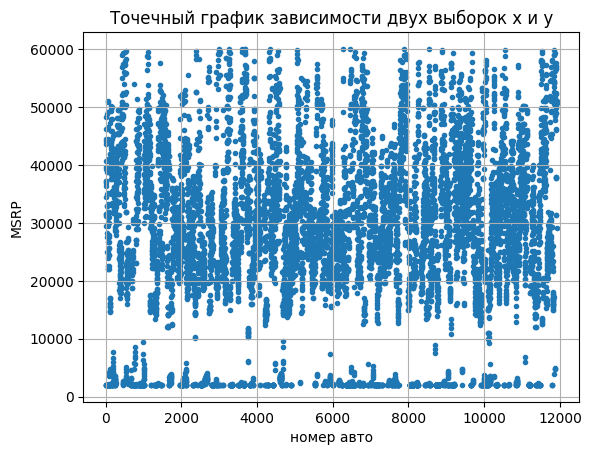

In [28]:
x = df.index[df.MSRP < 60000]
y = df.loc[x, 'MSRP']

plt.xlabel('номер авто')
plt.ylabel('MSRP')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(x, y, marker='.')
plt.show()

Стоимость авто более 60000:

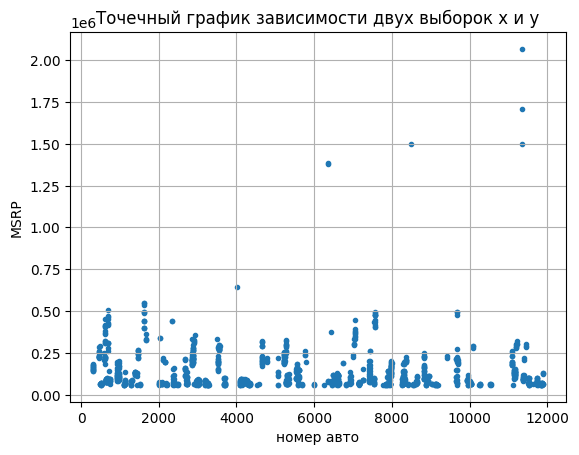

In [29]:
x = df.index[df.MSRP > 60000]
y = df.loc[x, 'MSRP']

plt.xlabel('номер авто')
plt.ylabel('MSRP')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(x, y, marker='.')
plt.show()

## Коррелляция

Взаимосвязь двух выборок друг от друга. Чтобы графически увидеть взаимосвязь двух переменных, необходимо построить точечный график зависимости друг от друга. Например, возьмем 2 параметра - make и MSRP. Зависит ли цена от производителя?

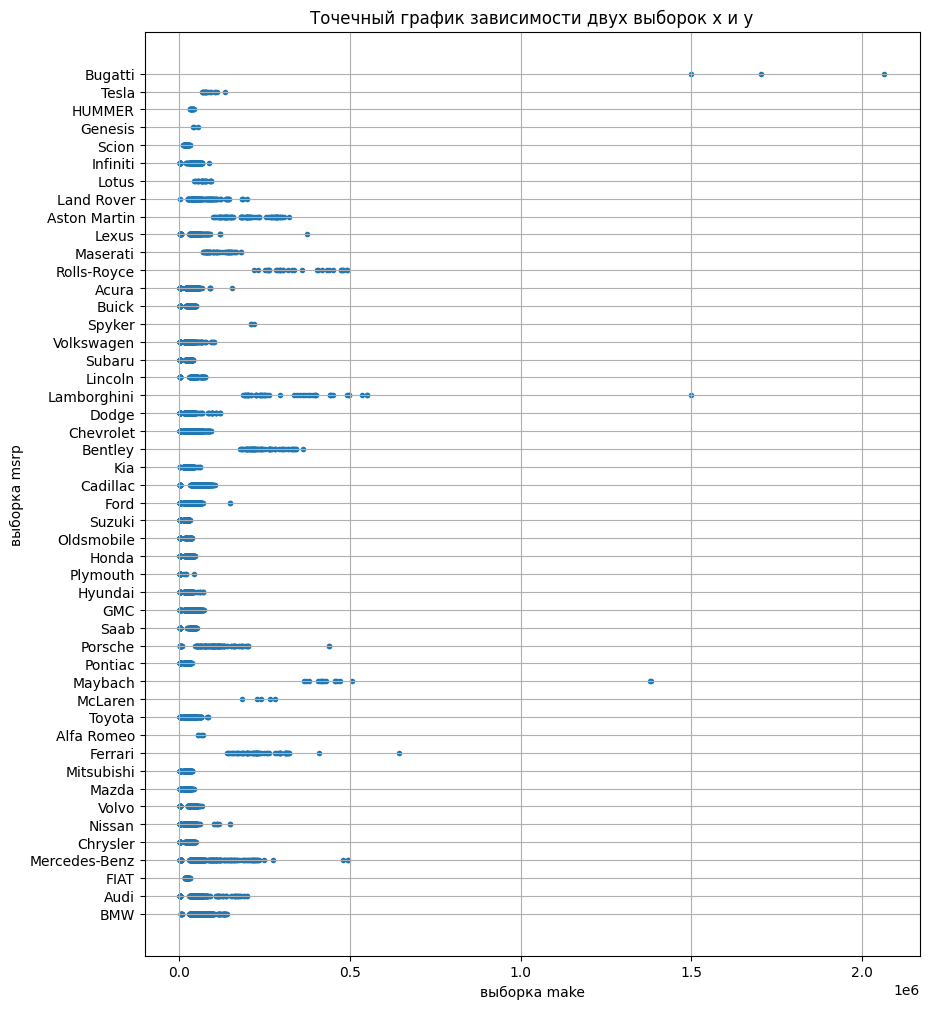

In [30]:
make = df.Make
msrp = df.MSRP
fig, ax = plt.subplots()
fig.set_size_inches(10, 12)
plt.xlabel('выборка make')
plt.ylabel('выборка msrp')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(msrp, make, marker='.')


Из графика видно что основная часть автомобилей стоит дешевле 0.5 млн

Удалим авто дороже 1.0 млн, так как слишком большое отклонение. Хотя для марок: Bugatti,lamborghini,maybach это нормальные цены авто

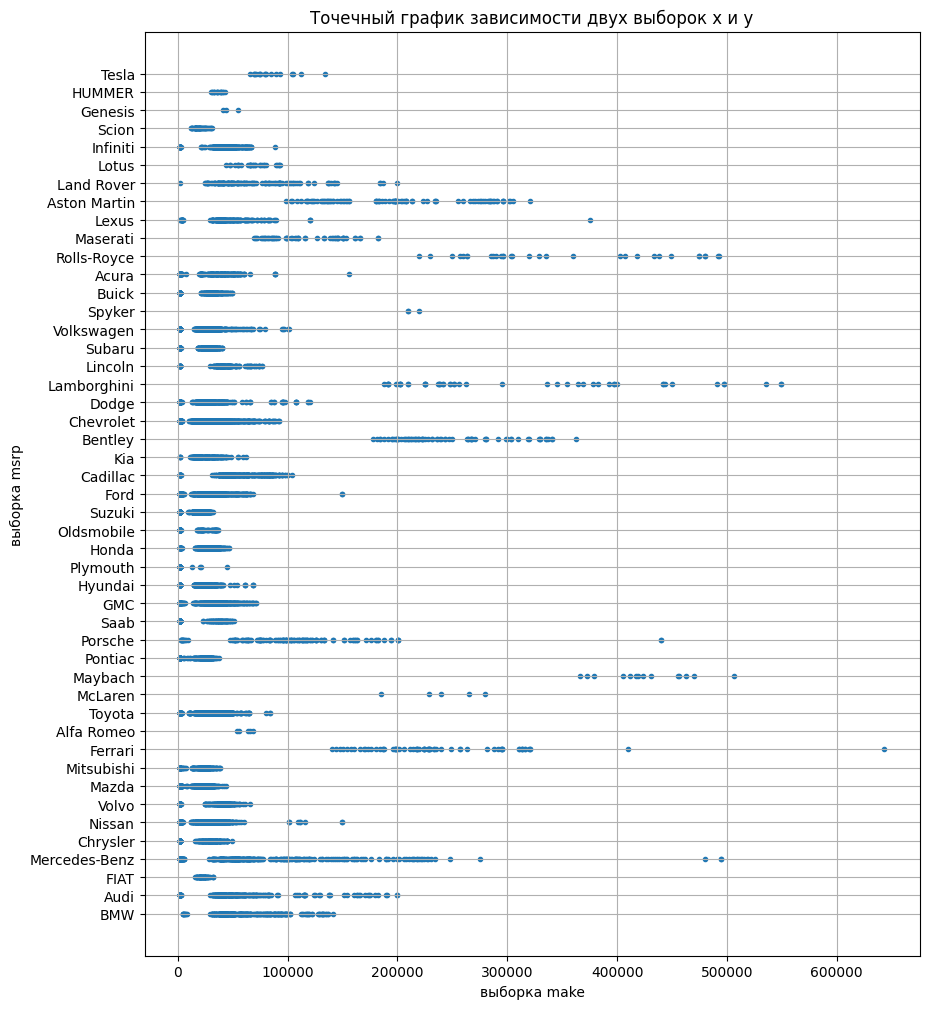

In [31]:
make = df.loc[df.MSRP < 1000000, 'Make']
msrp = df.loc[df.MSRP < 1000000, 'MSRP']
fig, ax = plt.subplots()
fig.set_size_inches(10, 12)
plt.xlabel('выборка make')
plt.ylabel('выборка msrp')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(msrp, make, marker='.')

**Выводы по графику** - что у цены на авто у многих производителей сгрупированы и смещены, что означает влияние бренда на стоимость авто

Для порядковых переменных используются следующие коэффициенты корреляции:
- коэффициент ранговой корреляции Спирмена;
- коэффициент ранговой корреляции Кендалла;
- коэффициент ранговой корреляции Гудмена–Краскела.

Если, по меньшей мере, одна из двух переменных имеет порядковую шкалу либо не является нормально
распределённой, используется ранговая корреляция Спирмана или Кендалла. Применение коэффициента Кендалла предпочтительно, если в исходных данных имеются выбросы.


## Корелляция Пирсона

1. Экспериментальные данные должны быть представлены в только в  интервальной шкале  или шкале отношений.
2. Распределение экспериментальных данных подчиняется нормальному закону.
3. Предполагается линейная зависимость между случайными величинами X и Y.

In [32]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(LabelEncoder().fit_transform(df.Make), df.MSRP)
print('Коэффициент корреляции Пирсона:', corr)

Коэффициент корреляции Пирсона: -0.10733055794838361


Чтобы приступать к расчетам коэффициента корреляции r-Пирсона необходимо выполнение следующих условий:

*  Исследуемые переменные X и Y должны быть распределены нормально (делаем допущение, что переменные распределены нормально).
*  Исследуемые переменные X и Y должны быть измерены в интервальной шкале или шкале отношений.
*  Количество значений в исследуемых переменных X и Y должно быть одинаковым.

Чем коэффициент ближе к 0, тем более независимы переменные.

**Минусы коэффициента корреляции Пирсона:**
- Неустойчивость к выбросам.
- С помощью коэффициента корреляции Пирсона можно определить только силу линейной взаимосвязи между переменными, другие виды взаимосвязей выявляются методами регрессионного анализа.

## Корелляция Спирмена

При расчете коэффициента корреляции Спирмена требования к исходным данным менее строгие, а именно:
1. Данные могут быть представлены в порядковой, интервальной шкале или шкале отношений.
2. Допускается любой закон распределения случайных величин X и Y.
3. Между случайными величинами X и Y должна существовать монотонно-возрастающая или монотонно-убывающая зависимость.

In [33]:
cor, p_value = sts.spearmanr(LabelEncoder().fit_transform(df.Make), df.MSRP)
print(cor)

-0.1963636532943462


## Тау Кендалла

Коэффициент ранговой корреляции tau-Кендалла является альтернативой методу определения корреляции r-Спирмана. Он предназначен для определения взаимосвязи между двумя ранговыми переменными.

Тау Кендалла - это мера соответствия между двумя рейтингами. Значения, близкие к 1, указывают на полное согласие, значения, близкие к -1, указывают на сильное несогласие. Это тау-б версия тау Кендалла, которая учитывает связи.

In [34]:
cor, p_value = sts.kendalltau(LabelEncoder().fit_transform(df.Make), df.MSRP)
print(cor, p_value)

-0.1303991206804827 1.800945664372586e-96


# Пример корелляции данных, загруженных с помощью pandas

Матрица корреляций.

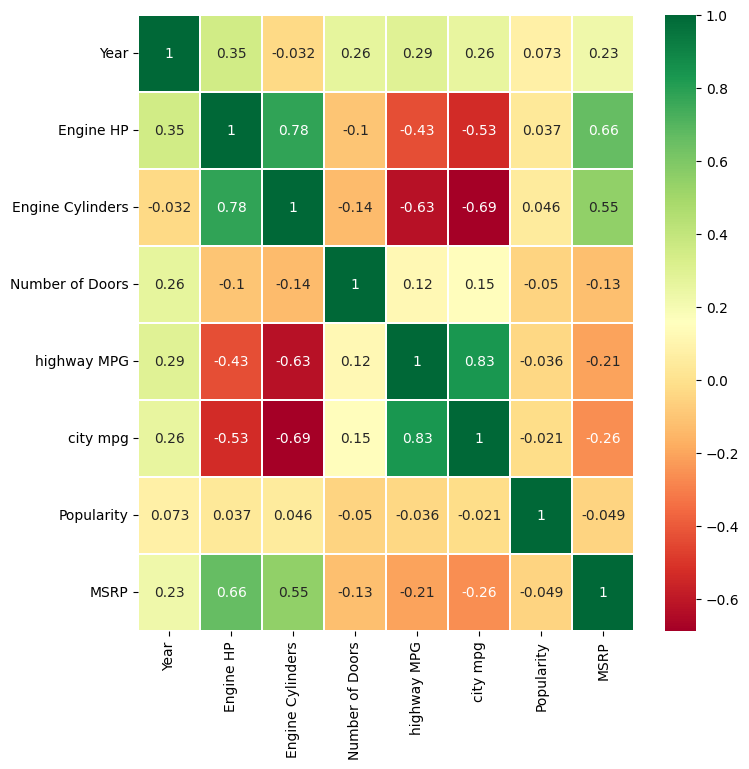

In [50]:
import seaborn as sns
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()


### Входные параметры:
* Параметры highway и city MPG имею схожую корреляцию с другими параметрами и одинаково коррелируются с выходным параметром.
* Параметры Engine HP и Engine Cylinders имею близкую корреляцию с другими параметрами и примерно одинаково коррелируются с выходным параметром.
### С выходным параметром:
* Слабая корреляция MSRP с : годом выпуска, кол-вом дверей, с раходом топлива на трассе и в городе, популярностью
* Средняя корреляция MSRP с кол-во цилиндров
* Сильная корреляция MSRP с мощьностью двигателя

## Выбросы

**Выбросы** - отсутствующих значений в данной колонке нет

Выброс (англ. outlier), промах — в статистике результат измерения, выделяющийся из общей выборки.

In [36]:
df.MSRP.isnull().sum()

0

В колонке стоимости нулевых значений нет

In [37]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Vehicle Size', 'Vehicle Style', 'highway MPG',
       'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [38]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


* В столбцах "Engine HP", "Engine Cylinders", "Number of Doors" есть пропуски данных, потому что count меньше чем размер выборки
* В столбце Engine Cylinders есть значения 0.0, что также можно считать отсутствием данных

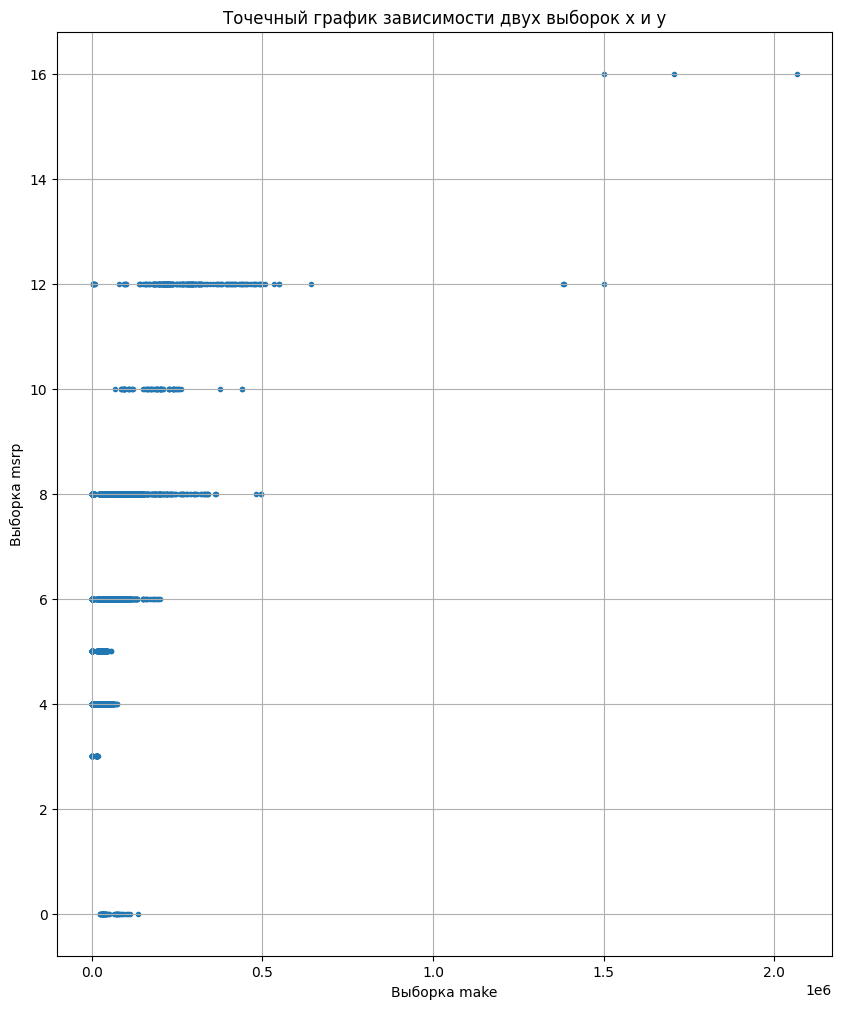

In [39]:
make = df['Engine Cylinders']
msrp = df.MSRP
fig, ax = plt.subplots()
fig.set_size_inches(10, 12)
plt.xlabel('Выборка make')
plt.ylabel('Выборка msrp')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(msrp, make, marker='.')

In [40]:
df['Engine Cylinders'].replace(0.0, np.nan, inplace=True)
df.dropna(inplace=True)

Удалим эти значения, считая их выбросами.

In [41]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11799.000000,11799.000000,11799.000000,11799.000000,11799.000000,11799.000000,11799.000000,1.179900e+04
mean,2010.355793,249.605560,5.655649,3.431901,26.236461,19.216968,1553.202983,4.056660e+04
std,7.596753,109.223213,1.742538,0.883205,6.988186,5.568027,1440.121722,6.031641e+04
min,1990.000000,55.000000,3.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.098700e+04
50%,2015.000000,227.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.997000e+04
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.220000e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,58.000000,5657.000000,2.065902e+06


In [42]:
df.min(numeric_only=True)

Year                1990.0
Engine HP             55.0
Engine Cylinders       3.0
Number of Doors        2.0
highway MPG           12.0
city mpg               7.0
Popularity             2.0
MSRP                2000.0
dtype: float64

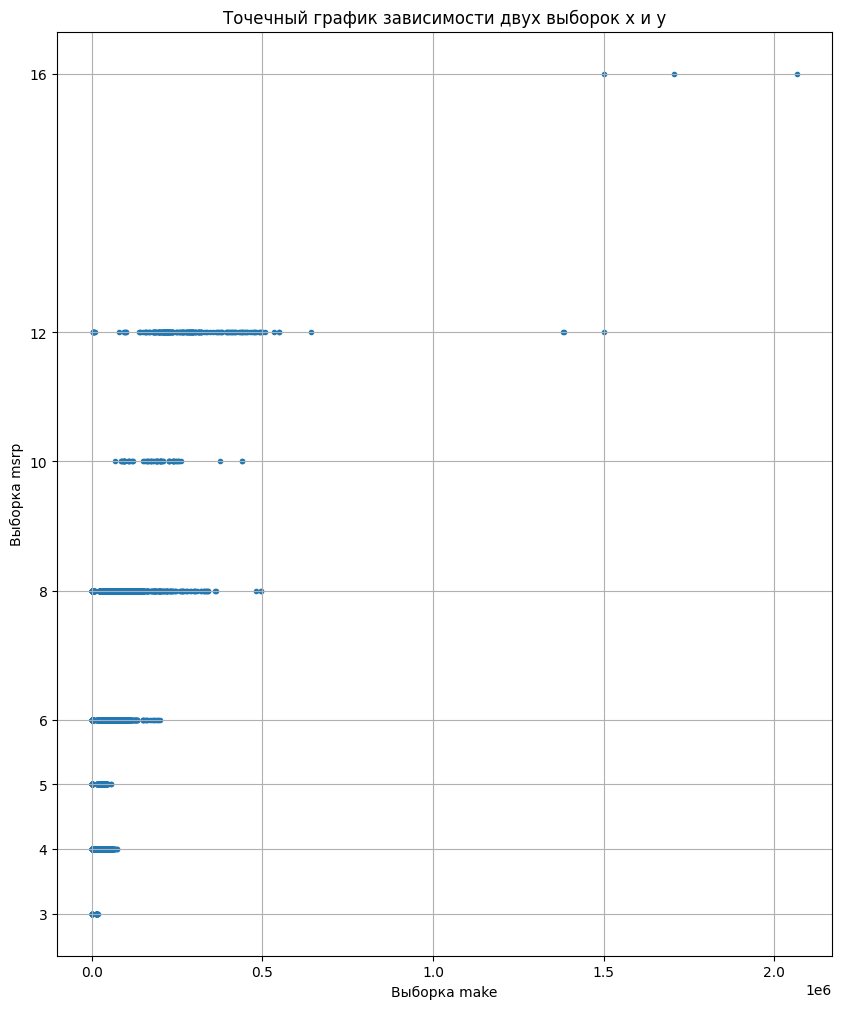

In [43]:
make = df['Engine Cylinders']
msrp = df.MSRP
fig, ax = plt.subplots()
fig.set_size_inches(10, 12)
ax.set_yticks(make.unique())
plt.xlabel('Выборка make')
plt.ylabel('Выборка msrp')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(msrp, make, marker='.')


Можно заметить, что картина стала более ясная после удаления выбросов.

# РАСПРЕДЕЛЕНИЕ

# Нормальное распределение

**Зададим нормальное распределение теоритически.**

Частотный график выборки y  (или график плотности вероятности).

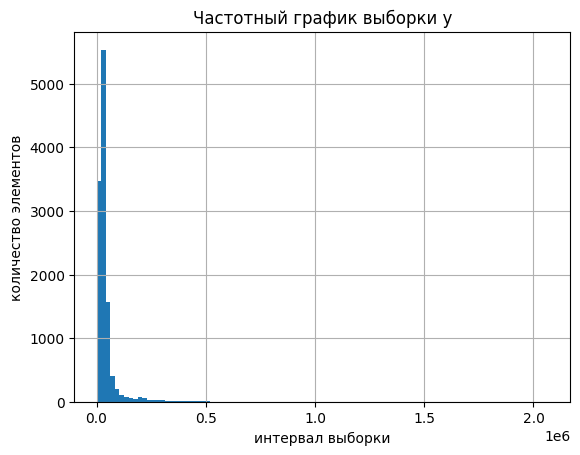

In [44]:
plt.hist(df.MSRP,100)
plt.xlabel('интервал выборки')
plt.ylabel('количество элементов')
plt.title('Частотный график выборки y')
plt.grid(True)
plt.show()

Построим графики функции плотности вероятности:

<AxesSubplot: xlabel='MSRP', ylabel='Density'>

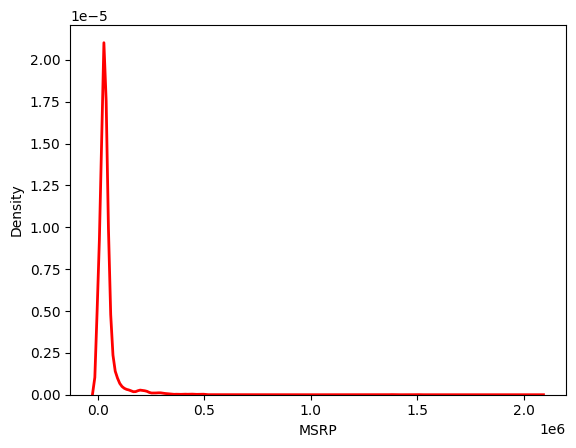

In [45]:
sns.kdeplot(data=df['MSRP'], color='red', linewidth=2)

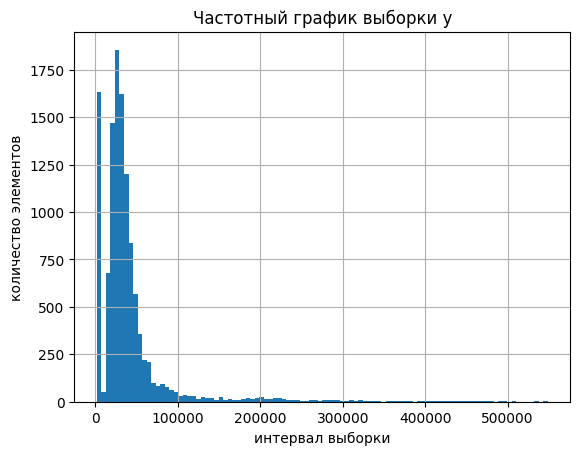

In [46]:
plt.hist(df.loc[df.MSRP < 600000, 'MSRP'], 100)
plt.xlabel('интервал выборки')
plt.ylabel('количество элементов')
plt.title('Частотный график выборки y')
plt.grid(True)
plt.show()

<AxesSubplot: xlabel='MSRP', ylabel='Density'>

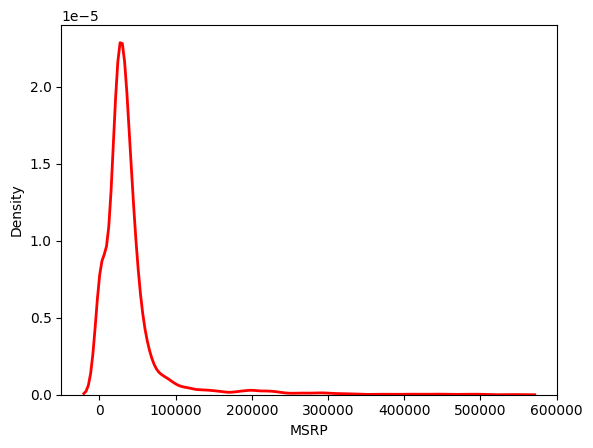

In [47]:
sns.kdeplot(data=df.loc[df.MSRP < 600000, 'MSRP'], color='red', linewidth=2)

## Коэффициент островершинности, коэффициент эксцесса и коэффициент асимметрии

На практике для анализа распределения переменной и подбора преобразований, максимизирующих
нормальность, пользуются коэффициентом островершинности, или куртосисом (`kurtosis`), коэффициентом
эксцесса (`excess kurtosis`), коэффициентом асимметрии (`skewness`), строят гистограмму распределения, графики квантиль–квантиль и ящичковую диаграмму.



**Коэффициент островершинности, или куртосис (kurtosis)**, – это мера остроты пика в распределении случайной величины. Он характеризует распределение, в котором значения величины либо сосредоточены близко к среднему значению, либо, наоборот, распределены далеко от него.




Для стандартного нормального распределения коэффициент островершинности равен 3. На практике используют эту же формулу, но с вычитанием 3, чтобы коэффициент был равен 0.

<img width="550" height="150" src='https://drive.google.com/uc?id=1tyi-i6xc7rCLslN4MZfth3IJ5CSufKIT' />


И такой коэффициент называют уже коэффициентом эксцесса (excess kurtosis). Прилагательное excess здесь буквально означает «выходящий за рамки нормы». Это дает удобство интерпретации. Если коэффициент эксцесса положителен (коэффициент островершинности > 3), то распределение будет иметь острую вершину, мы имеем дело с островершинным распределением. Если коэффициент эксцесса отрицателен (коэффициент островершинности < 3), то распределение будет иметь пологую вершину, мы имеем дело с плосковершинным распределением. Если коэффициент эксцесса равен нулю (коэффициент островершинности равен 3), наше распределение является нормальным.

<img width="650" height="250" src='https://drive.google.com/uc?id=1HGSgBJzdOseF1DqxwSMRn1bQSQ3alAJ2' />



Ниже приведен график распределений с разным значением эксцесса.
<img  src='https://drive.google.com/uc?id=1Oet8x3Bynhrx_P2vIndDoD4RnT5SWDTS' />



**Коэффициент асимметрии, или скоса (skewness)**, – мера асимметрии распределения случайной величины. Он вычисляется по формуле:

<img width="450" height="150" src='https://drive.google.com/uc?id=1zo5Yxw4lerZQnV8-orihRu2jT5VwQ8Kz' />





 Если асимметрия близка к 0 (например, между -0,5 и 0,5), то набор данных считается относительно симметричным.

- Если у вас будет преобладание чисел меньше среднего,
вы получите отрицательный коэффициент асимметрии.
- Если у вас будет преобладание чисел больше среднего, вы получите положительный коэффициент асимметрии.
- Если у вас симметрия, числа взаимно скомпенсируют друг друга. Для стандартного нормального распределения коэффициент асимметрии равен нулю.

Если коэффициент асимметрии положителен, то распределение будет скошено вправо, если отрицателен, распределение будет скошено влево. При левосторонней асимметрии мода больше медианы, а медиана больше, чем среднее значение. При правосторонней асимметрии среднее значение больше
медианы, а медиана больше моды. Для нормального распределения мода, медиана и среднее значение одинаковы.

Рассчитаем асимметрию с помощью `scipy.stats.skew()`:


Распределение на основе значения асимметрии:

Асимметрия = 0: тогда нормально распределяется.

Асимметрия> 0: тогда больше веса в левом хвосте распределения.

Асимметрия < 0: тогда больше веса в правом хвосте распределения.

In [48]:
#Вычислите эксцесс набора данных.
kurt=sts.kurtosis(df.MSRP, axis=0, fisher=True, bias=True)
sk= sts.skew(df.MSRP, axis=0, bias=True)
print(kurt,sk)

267.7027672381741 11.757271408084575


Для нормально распределенных данных асимметрия должна быть около нуля.
По данным ассиметрии и эксцесса можно сказать, что показатель "стоимость (MSRP)" не подчиняется нормальному закону распределения. Эксцесс также отличен от нормального распределения, большая островершиность